<a href="https://colab.research.google.com/github/PATELDA/DAKSH/blob/main/Daksh_assesment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


print("Libraries imported successfully!")

Libraries imported successfully!


In [617]:
df = pd.read_csv('/content/adverts.csv')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [618]:
if len(df) >= 2500:
    sample_data = df.sample(n=2500, random_state=16)
    sample_data.to_csv('/content/practical_adverts.csv', index=False)
    print("Sampled data saved to 'practical_adverts.csv'.")
else:
    print("Dataset size is less than 3500. Saving original data.")
    df.to_csv('/content/practical_adverts.csv', index=False)

Sampled data saved to 'practical_adverts.csv'.


In [619]:
practical_adverts.head()


,mileage,standard_make,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,1.978328,33,1,-1.896233e-01,-0.126794,3,4
1,-1.109856,45,0,-5.466359e-15,0.030985,11,4
2,-0.560159,32,1,2.219678e-01,-0.021643,11,4
3,0.979210,15,1,-2.925211e-01,-0.325897,5,4
4,0.127810,3,1,1.190700e-01,-0.021468,12,0


In [620]:
practical_adverts = pd.read_csv('/content/practical_adverts.csv')
practical_adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       2500 non-null   int64  
 1   mileage                2500 non-null   float64
 2   reg_code               2289 non-null   object 
 3   standard_colour        2468 non-null   object 
 4   standard_make          2500 non-null   object 
 5   standard_model         2500 non-null   object 
 6   vehicle_condition      2500 non-null   object 
 7   year_of_registration   2281 non-null   float64
 8   price                  2500 non-null   int64  
 9   body_type              2493 non-null   object 
 10  crossover_car_and_van  2500 non-null   bool   
 11  fuel_type              2494 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 217.4+ KB


In [621]:
practical_adverts.describe()

,public_reference,mileage,year_of_registration,price
count,2.500000e+03,2500.000000,2281.000000,2500.000000
mean,2.020072e+14,36657.560800,2014.685664,17613.513600
std,1.787340e+10,33035.724099,20.352913,28583.787108
min,2.017012e+14,0.000000,1063.000000,400.000000
25%,2.020090e+14,10788.750000,2013.000000,7386.250000
50%,2.020093e+14,27662.000000,2016.000000,12486.500000
75%,2.020102e+14,55748.000000,2018.000000,19982.500000
max,2.020110e+14,173000.000000,2020.000000,999999.000000


In [622]:
practical_adverts.isnull().sum()

,0
public_reference,0
mileage,0
reg_code,211
standard_colour,32
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,219
price,0
body_type,7


In [623]:
numerical_features = ['mileage','reg_code','year_of_registration']

for feature in numerical_features:
    # Ensure 'reg_code' is treated as numeric, handling potential errors
    practical_adverts[feature] = pd.to_numeric(practical_adverts[feature], errors='coerce')  # Changed 'expanded_adverts' to 'practical_adverts'
    # Fill NaN values using the mean of the same column within 'practical_adverts'
    practical_adverts[feature] = practical_adverts[feature].fillna(practical_adverts[feature].mean()) # Changed 'expanded_adverts' to 'practical_adverts'

In [624]:
# Fill missing values in categorical columns with the mode
categorical_columns = ['standard_colour', 'body_type', 'fuel_type']
for col in categorical_columns:
    # Replace 'expanded_adverts' with 'practical_adverts' to use the correct DataFrame
    practical_adverts[col] = practical_adverts[col].fillna(practical_adverts[col].mode()[0])

In [625]:
practical_adverts.isnull().sum()

,0
public_reference,0
mileage,0
reg_code,0
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0


In [626]:
# prompt: # List of columns to drop
# columns_to_drop = ['public_reference', 'reg_code', 'crossover_car_and_van', 'standard_colour', 'standard_model'] want to drop it

# List of columns to drop
columns_to_drop = ['public_reference', 'reg_code', 'crossover_car_and_van', 'standard_colour', 'standard_model']

# Drop the specified columns from the DataFrame
practical_adverts = practical_adverts.drop(columns=columns_to_drop, errors='ignore')



In [627]:


le = LabelEncoder()

# Assuming 'final_data' is a DataFrame you've defined elsewhere
for col in practical_adverts.select_dtypes(include=['object', 'bool']): # Assuming you want to use 'practical_adverts'
    practical_adverts[col] = le.fit_transform(practical_adverts[col]) # Assuming you want to use 'practical_adverts'
    practical_adverts.to_csv('/content/label.csv', index=False)
print("Encoded data saved to 'label.csv'")

Encoded data saved to 'label.csv'


In [628]:
practical_adverts.head()

,mileage,standard_make,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,102000.0,33,1,2011.000000,13990,3,4
1,0.0,45,0,2014.685664,18499,11,4
2,18156.0,32,1,2019.000000,16995,11,4
3,69000.0,15,1,2009.000000,8300,5,4
4,40879.0,3,1,2017.000000,17000,12,0


In [629]:
# prompt: save cleaned data set

practical_adverts.to_csv('/content/cleaned_adverts.csv', index=False)
print("Cleaned data saved to 'cleaned_adverts.csv'")

Cleaned data saved to 'cleaned_adverts.csv'


In [630]:


# Load the cleaned data
practical_adverts = pd.read_csv('/content/cleaned_adverts.csv')

# Select numerical features for normalization
numerical_features_to_normalize = ['mileage', 'year_of_registration', 'price']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
practical_adverts[numerical_features_to_normalize] = scaler.fit_transform(practical_adverts[numerical_features_to_normalize])

# Save the normalized data
practical_adverts.to_csv('/content/normalized_adverts.csv', index=False)
print("Normalized data saved to 'normalized_adverts.csv'")

Normalized data saved to 'normalized_adverts.csv'


In [631]:
# prompt: standarization

# Load the normalized data
practical_adverts = pd.read_csv('/content/normalized_adverts.csv')

# Select numerical features for standardization
numerical_features_to_standardize = ['mileage', 'year_of_registration', 'price']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
practical_adverts[numerical_features_to_standardize] = scaler.fit_transform(practical_adverts[numerical_features_to_standardize])

# Save the standardized data
practical_adverts.to_csv('/content/standardized_adverts.csv', index=False)
print("Standardized data saved to 'standardized_adverts.csv'")

Standardized data saved to 'standardized_adverts.csv'


In [632]:
# Assuming 'practical_adverts' contains your final data after processing
X = practical_adverts.drop(columns=['price'])
y = practical_adverts['price']

In [633]:

 object_cols = X.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

selector = SelectKBest(f_regression, k=5)
X_selected = selector.fit_transform(X, y)

In [634]:

Q1 = practical_adverts['price'].quantile(0.25)
Q3 = practical_adverts['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

practical_adverts = practical_adverts[(practical_adverts['price'] >= lower_bound) & (practical_adverts['price'] <= upper_bound)]

In [635]:
features_to_standardize = ['mileage','standard_make','standard_model','vehicle_condition','year_of_registration','fuel_type']

In [636]:
features_to_standardize = ['mileage','standard_make','vehicle_condition','year_of_registration','fuel_type'] # Removed 'standard_model'
X = practical_adverts[features_to_standardize]
y = practical_adverts['price']

In [637]:
X_train, X_test, y_train, y_test = train_test_split(practical_adverts[features_to_standardize], y,  test_size=0.2, random_state=42)

In [638]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [639]:
 # explicitly importing r2_score
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred1 = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred1)  # Now calls the imported function
print(f"R-squared score: {r2}")

R-squared score: 0.7084960291036776


In [640]:
y_pred1 = rf_model.predict(X_test)

In [641]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [642]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1,2,4]
}

In [643]:
rf_model = RandomForestRegressor()

In [644]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2', cv=5,n_jobs=-1)

In [645]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [646]:
best_model = grid_search.best_estimator_

In [647]:
y_pred = best_model.predict(X_test)

In [648]:
r2 = r2_score(y_test, y_pred)

In [649]:
print(f"R-squared score of the best model: {r2}")

R-squared score of the best model: 0.7088979178445038


In [650]:
X_train, X_test, y_train, y_test = train_test_split(practical_adverts[features_to_standardize], y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree R-squared score: {r2_dt}")

Decision Tree R-squared score: 0.6428281606235431


In [651]:
!pip install shap

import shap

In [652]:
!pip install shap

explainer = shap.Explainer(best_model.predict, X_train)

shap_values = explainer(X_test)

ExactExplainer explainer: 468it [00:46,  7.71it/s]


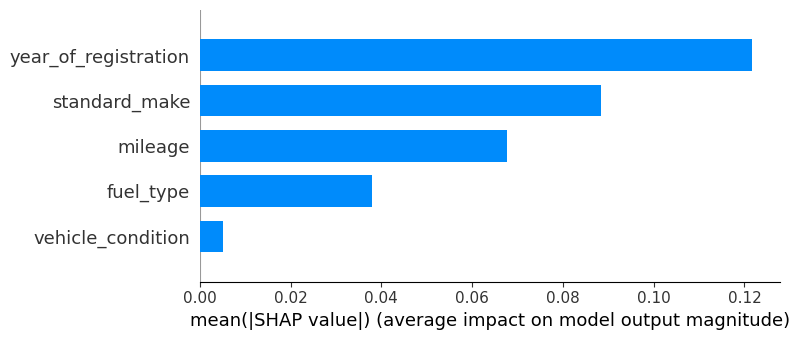

<Figure size 640x480 with 0 Axes>

In [653]:
plt.figure(figsize=(10, 6))

shap.summary_plot(shap_values, X_test, plot_type="bar")

plt.tight_layout()
plt.show()

In [658]:
!pip install explainerdashboard dash

from explainerdashboard import RegressionExplainer, ExplainerDashboard

# Assuming best_model, X_test, and y_test are defined
explainer = RegressionExplainer(best_model, X_test, y_test)

# Run ExplainerDashboard
ExplainerDashboard(explainer, title="Car Price Prediction Dashboard").run(port=8052, mode='inline')


Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8052))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>